<a href="https://colab.research.google.com/github/vrhughes/DS4002-Group13/blob/main/twitterccdata_vh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cloning Git Location
! git clone https://github.com/vrhughes/DS4002-Group13

Cloning into 'DS4002-Group13'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 4), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 4.92 MiB | 8.03 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
# Reading In The Data
data = pd.read_csv('/content/DS4002-Group13/Project 1/twitter_sentiment_data.csv')
data.head()

# data is a DataFrame (43943, 3)
# in the sentiment column 1 is pro/believes, -1 is anti/non-believer, 0 is neutral

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [ ]:
# Basic Cleaning Of "data"

# 1. Deleting tweetid column
data.drop(['tweetid'], axis = 1, inplace = True)
print("Dropped tweetid column")
print(data.head())

# 2. Getting rid of sentiment rows with value of 2(they're news sites not users)
data = data.drop(data[data['sentiment'] == 2].index)
print("Dropped sentiment rows with value of 2")
print(data.head())

# data is still a DataFrame, new dimensions (34667, 2)

Dropped tweetid column
   sentiment                                            message
0         -1  @tiniebeany climate change is an interesting h...
1          1  RT @NatGeoChannel: Watch #BeforeTheFlood right...
2          1  Fabulous! Leonardo #DiCaprio's film on #climat...
3          1  RT @Mick_Fanning: Just watched this amazing do...
4          2  RT @cnalive: Pranita Biswasi, a Lutheran from ...
Dropped sentiment rows with value of 2
   sentiment                                            message
0         -1  @tiniebeany climate change is an interesting h...
1          1  RT @NatGeoChannel: Watch #BeforeTheFlood right...
2          1  Fabulous! Leonardo #DiCaprio's film on #climat...
3          1  RT @Mick_Fanning: Just watched this amazing do...
5          0  Unamshow awache kujinga na iko global warming ...


In [ ]:
# Finding Most Frequently Used Words
import nltk
nltk.download('punkt_tab')

data_exp = data.copy()

data_exp['tokenized_tweet'] = data_exp['message'].apply(nltk.word_tokenize)
data_exp.head()

# the tokenized_tweet column contains series of tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,sentiment,message,tokenized_tweet
0,-1,@tiniebeany climate change is an interesting h...,"[@, tiniebeany, climate, change, is, an, inter..."
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"[RT, @, NatGeoChannel, :, Watch, #, BeforeTheF..."
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,"[Fabulous, !, Leonardo, #, DiCaprio, 's, film,..."
3,1,RT @Mick_Fanning: Just watched this amazing do...,"[RT, @, Mick_Fanning, :, Just, watched, this, ..."
5,0,Unamshow awache kujinga na iko global warming ...,"[Unamshow, awache, kujinga, na, iko, global, w..."


In [ ]:
#
from collections import Counter
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

stop_words.update(list(string.punctuation))
print(stop_words)

tw_stopwords = ['rt', 'https', "'", "'s", "n't", "...", "…", 'http', "’", 'amp', 'would', 'one', 'q', 'you', 'make']
incl_stop = stop_words.union(tw_stopwords)

excl_stop = {'against', "isn't", 'doesn', "don't", "i", 'you', "shouldn't"}
new_stop = set([word for word in incl_stop if word not in excl_stop])

print(new_stop)


{"isn't", 'her', 'ain', 'myself', 'couldn', 'in', 'a', 'out', 'mightn', 'having', "hasn't", 'to', 'll', 'below', 'during', 'yourselves', "didn't", 'each', 'its', 'any', 'are', 'ourselves', 's', 'now', 'did', 'off', 'he', 'you', 't', 'who', 'where', 'should', 'itself', 'about', 'has', "wasn't", 'this', "you'd", 'they', 'was', 'themselves', 'hers', 'himself', "hadn't", 'nor', 'very', "couldn't", 'y', 'between', 'at', 'so', 'me', 'into', "don't", 'because', 'wasn', "shouldn't", 'other', 'doing', 'through', 'm', "haven't", 'your', 'd', 'doesn', "aren't", 'needn', 'but', 'am', "you're", 'of', "you've", 'too', 'up', 'after', 'only', 'our', "mightn't", 'is', "wouldn't", 'same', 'here', 'theirs', 'ours', 'that', "you'll", 'which', 'mustn', 'hadn', 'don', 'both', 'weren', 'not', 'my', 'how', 'such', 'than', 'aren', 'down', 'isn', 'we', 've', 'haven', 'on', 'there', 'while', 'o', 'or', 'over', 'it', 'as', 'i', 'why', 'won', "won't", 'for', 'been', 'under', 'have', 'further', 'yourself', 'being',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# flattening/simplifying all the tokens in the dataframe to one list
all_tokens = [word.lower() for tokens in data_exp['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# counting the frequency
token_freq = Counter(all_tokens)

# most used tokens
most_common_tokens = token_freq.most_common(30)

# creating a dataframe with the token frequency
token_df = pd.DataFrame(most_common_tokens, columns=['Token','Frequency'])

# display
for word, count in most_common_tokens:
    print(f"{word}: {count}")

climate: 26335
change: 25531
global: 9227
warming: 8749
you: 3987
i: 3826
trump: 2872
believe: 2257
real: 1685
people: 1494
world: 1405
us: 1325
going: 1272
like: 1223
new: 960
fight: 905
think: 889
science: 876
via: 822
need: 814
hoax: 800
know: 736
die: 728
say: 711
scientists: 657
weather: 640
realdonaldtrump: 634
time: 629
epa: 622
could: 614


<ipython-input-25-057cd260b0ad>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 50,


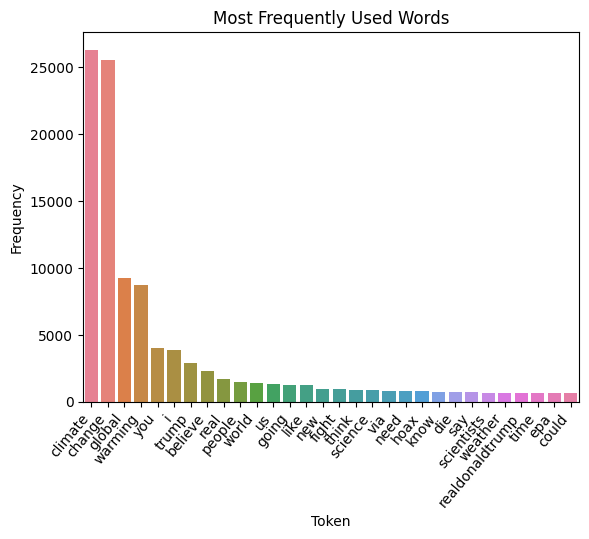

In [ ]:
# one plot with all the top 30 words

plot1 = sns.barplot(
    x = 'Token',
    y = 'Frequency',
    data = token_df,
    hue = 'Token'
)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation = 50,
                      horizontalalignment = 'right',
                      fontsize = 10)
plt.title('Most Frequently Used Words')
plt.show()

<ipython-input-31-e0aeb5a87190>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot2.set_xticklabels(plot2.get_xticklabels(), rotation = 50,


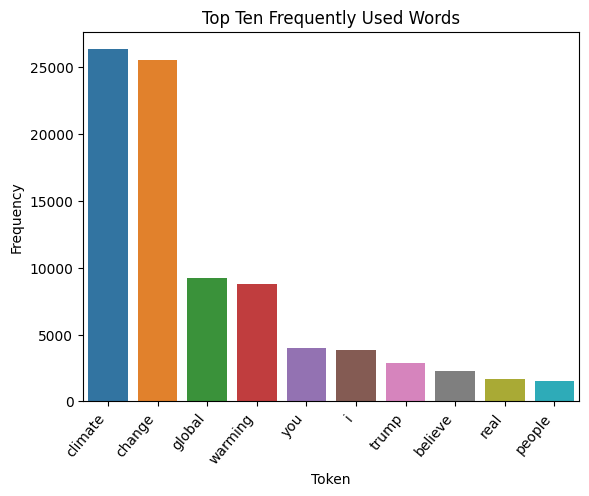

In [ ]:
# making smaller data frame with top ten

all_tokens = [word.lower() for tokens in data_exp['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]
# counting token frequency
token_freq = Counter(all_tokens)
# top ten used tokens
top_ten_tokens = token_freq.most_common(10)
# creating a dataframe with only the top tokens
top_ten_token_df = pd.DataFrame(top_ten_tokens, columns=['Token','Frequency'])


# another plot, this one with the top ten words
plot2 = sns.barplot(
    x = 'Token',
    y = 'Frequency',
    data = top_ten_token_df,
    hue = 'Token'
)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation = 50,
                      horizontalalignment = 'right',
                      fontsize = 10)
plt.title('Top Ten Frequently Used Words')
plt.show()

In [ ]:
# some analysis of trump-specific mentions

token_df.head(30)

,Token,Frequency
0,climate,26335
1,change,25531
2,global,9227
3,warming,8749
4,you,3987
5,i,3826
6,trump,2872
7,believe,2257
8,real,1685
9,people,1494


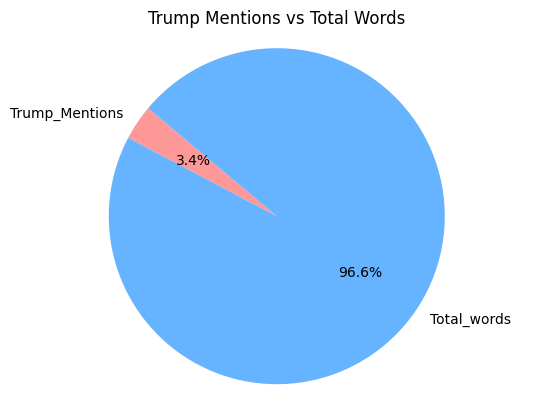

In [ ]:
# creating a pie chart comparing trump mentions to overall mentions

total_frequency = token_df['Frequency'].sum()

labels = ['Trump_Mentions', 'Total_words']
numbers = 3506, total_frequency - 3506

colors = ['#ff9999', '#66b3ff',]

plt.pie (numbers, labels = labels, autopct = '%1.1f%%', startangle = 140, colors = colors)
plt.axis('equal')
plt.title('Trump Mentions vs Total Words')
plt.show()